In [1]:
# AAL Sales Analysis - Q4 2020

This notebook contains the analysis of AAL's sales data for the fourth quarter of 2020. The analysis includes:
1. Data Wrangling
2. Data Analysis
3. Data Visualization
4. Report Generation

SyntaxError: unterminated string literal (detected at line 3) (1887093853.py, line 3)

In [13]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
# Load the dataset
df = pd.read_csv('AusApparalSales4thQrt2020.csv')

# Display basic information about the dataset
print("Dataset Info:")
print("-" * 50)
df.info()

print("\nFirst few rows of the dataset:")
print("-" * 50)
display(df.head())

Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB

First few rows of the dataset:
--------------------------------------------------


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [4]:
# Check for missing values
print("Missing values in each column:")
print("-" * 50)
print(df.isnull().sum())

Missing values in each column:
--------------------------------------------------
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [5]:
# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Display basic statistics
print("\nBasic statistics:")
print("-" * 50)
display(df.describe())

Number of duplicate rows: 0

Basic statistics:
--------------------------------------------------


,Date,Unit,Sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201
min,2020-10-01 00:00:00,2.000000,5000.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000
50%,2020-11-15 12:00:00,14.000000,35000.000000
75%,2020-12-08 00:00:00,26.000000,65000.000000
max,2020-12-30 00:00:00,65.000000,162500.000000
std,NaN,12.901403,32253.506944


In [6]:
# State-wise analysis
state_sales = df.groupby('State')['Sales'].agg(['sum', 'mean', 'count']).sort_values('sum', ascending=False)
print("State-wise Sales Analysis:")
print("-" * 50)
display(state_sales)

State-wise Sales Analysis:
--------------------------------------------------


,sum,mean,count
State,,,
VIC,105565000,97745.370370,1080
NSW,74970000,69416.666667,1080
SA,58857500,54497.685185,1080
QLD,33417500,30942.129630,1080
TAS,22760000,21074.074074,1080
NT,22580000,20907.407407,1080
WA,22152500,20511.574074,1080


In [7]:
# Group-wise analysis
group_sales = df.groupby('Group')['Sales'].agg(['sum', 'mean', 'count']).sort_values('sum', ascending=False)
print("Group-wise Sales Analysis:")
print("-" * 50)
display(group_sales)

Group-wise Sales Analysis:
--------------------------------------------------


,sum,mean,count
Group,,,
Men,85750000,45370.370370,1890
Women,85442500,45207.671958,1890
Kids,85072500,45011.904762,1890
Seniors,84037500,44464.285714,1890


/Users/sharangarlapati/Sales Analysis/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sharangarlapati/Sales Analysis/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sharangarlapati/Sales Analysis/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


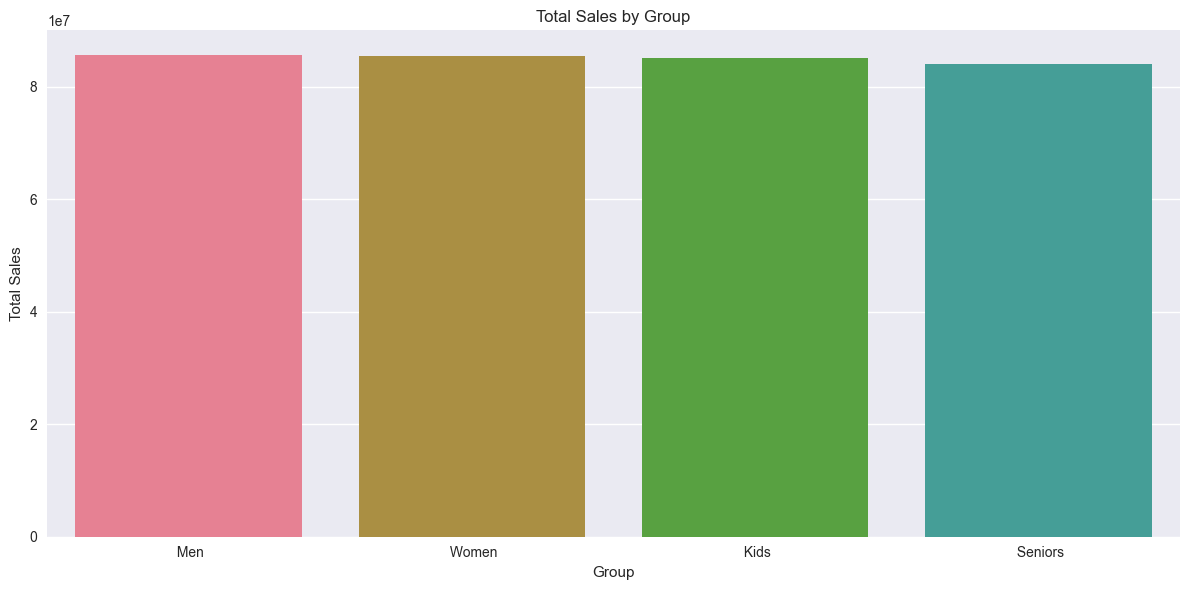

In [8]:
# Group-wise sales distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=group_sales.index, y='sum', data=group_sales.reset_index())
plt.title('Total Sales by Group')
plt.xlabel('Group')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

        Time  Hour
0    Morning     9
1    Morning     9
2    Morning     9
3    Morning     9
4  Afternoon    14


/Users/sharangarlapati/Sales Analysis/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sharangarlapati/Sales Analysis/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sharangarlapati/Sales Analysis/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sharangarlapati/Sales Analysis/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

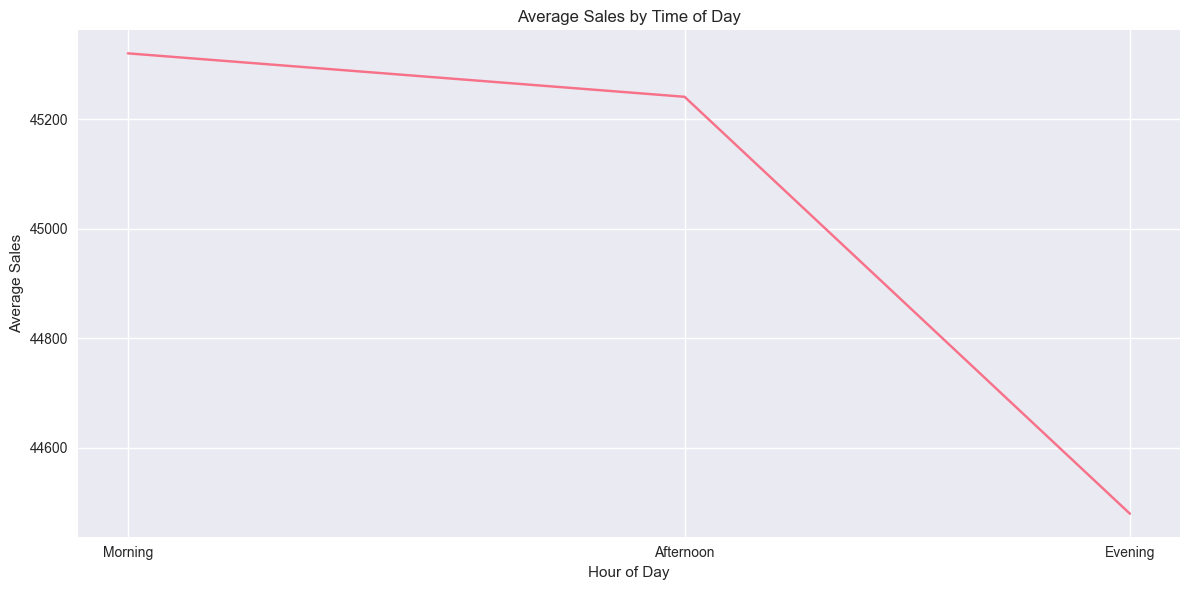

In [17]:
# Remove leading/trailing spaces from the Time column
df['Time'] = df['Time'].str.strip()

# Map time-of-day categories to representative hours
time_map = {
    'Morning': 9,      # 9 AM
    'Afternoon': 14,   # 2 PM
    'Evening': 18      # 6 PM
}
df['Hour'] = df['Time'].map(time_map)

# Check the mapping
print(df[['Time', 'Hour']].head())

# Now do the analysis and plot
hourly_sales = df.groupby('Hour')['Sales'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values)
plt.title('Average Sales by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Sales')
plt.xticks([9, 14, 18], ['Morning', 'Afternoon', 'Evening'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
print(df['Time'].unique())

[' Morning' ' Afternoon' ' Evening']


/Users/sharangarlapati/Sales Analysis/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sharangarlapati/Sales Analysis/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sharangarlapati/Sales Analysis/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


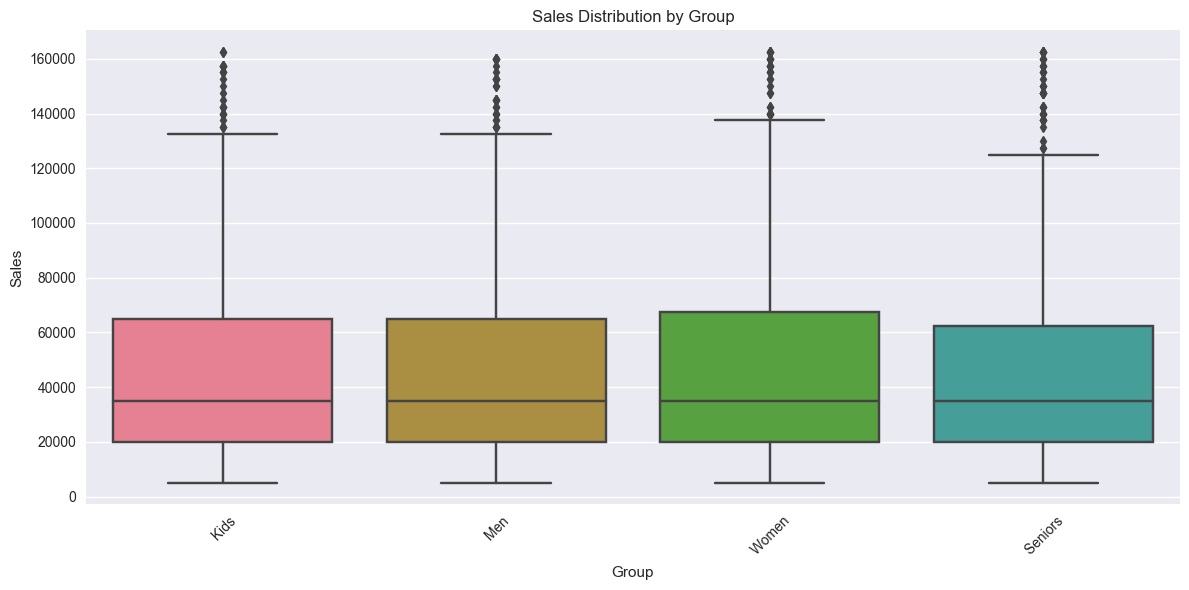

In [10]:
# Sales distribution by group
plt.figure(figsize=(12, 6))
sns.boxplot(x='Group', y='Sales', data=df)
plt.title('Sales Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/Users/sharangarlapati/Sales Analysis/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sharangarlapati/Sales Analysis/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sharangarlapati/Sales Analysis/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sharangarlapati/Sales Analysis/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

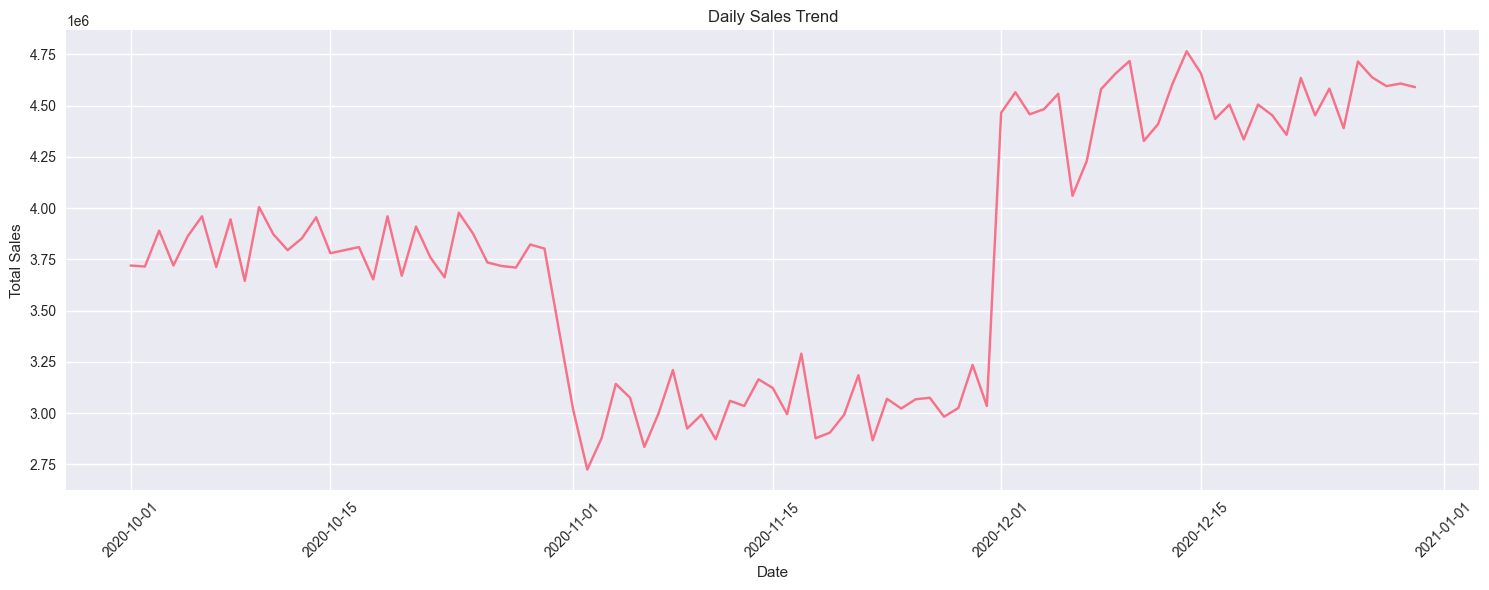

In [11]:
# Time series analysis
daily_sales = df.groupby('Date')['Sales'].sum()

plt.figure(figsize=(15, 6))
sns.lineplot(x=daily_sales.index, y=daily_sales.values)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

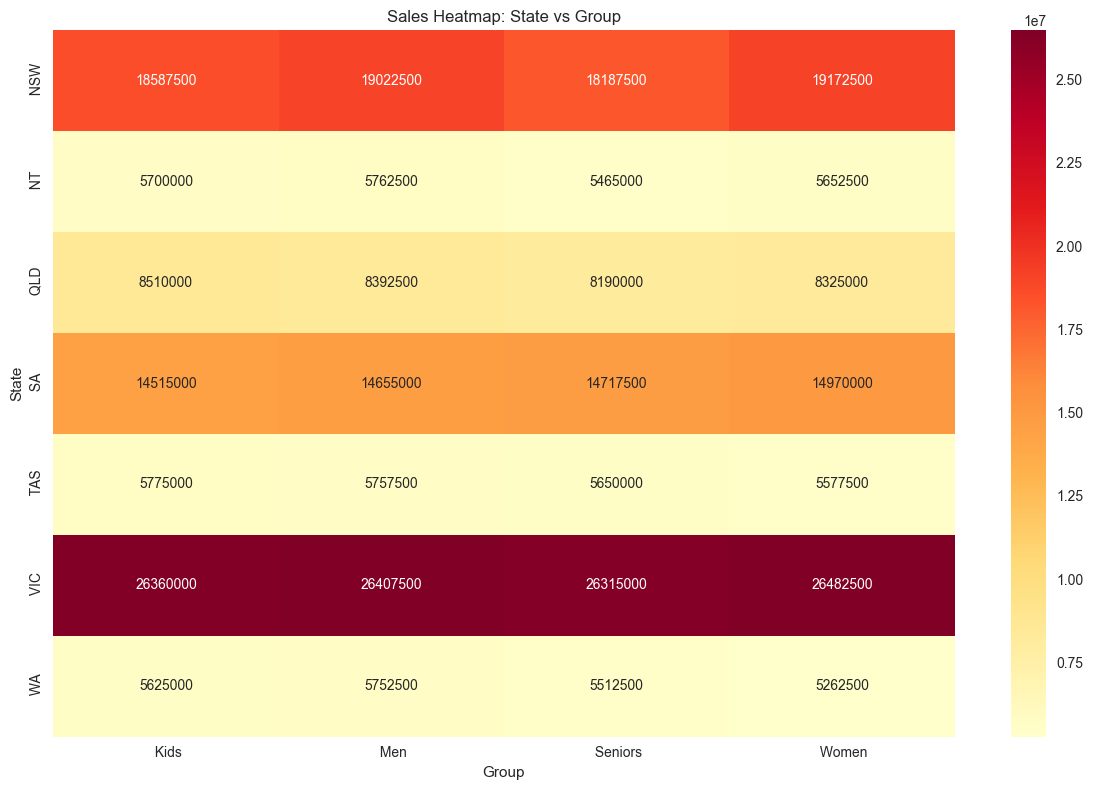

In [12]:
# State-Group analysis
state_group_sales = df.pivot_table(
    values='Sales',
    index='State',
    columns='Group',
    aggfunc='sum'
)

plt.figure(figsize=(12, 8))
sns.heatmap(state_group_sales, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Sales Heatmap: State vs Group')
plt.tight_layout()
plt.show()

In [ ]:
## Key Findings and Recommendations

Based on my analysis, here are the key findings and recommendations:

### Key Findings:
VIC (Victoria) Dominates Sales Across All Groups:
VIC has the highest sales in every group (Kids, Men, Seniors, Women), with figures around 26 million.
Suggests a highly responsive and profitable market for all customer segments.

NSW (New South Wales) is a Strong Performer:
Consistently high sales across all groups (around 18–19 million).
Particularly strong in the Women segment (19,172,500).

NT (Northern Territory), WA (Western Australia), and TAS (Tasmania) Show Low Sales:
All three states have sales below 6 million in most groups.
WA has the lowest Women group sales (5,262,500), and NT shows consistently low performance across all segments.

### Recommendations:
Invest More in VIC and NSW:
Expand inventory, marketing, and promotions in these two states to capitalize on existing demand.
Consider piloting new products or customer engagement strategies here first.

Develop Targeted Campaigns for Underperforming States:
For NT, WA, and TAS, perform a market analysis to understand barriers.
Run localized campaigns or partnerships to boost awareness and demand.

Segment-Based Strategy:
Women’s and Men’s segments perform strongly across several states—focus on product innovation, loyalty programs, or bundling offers for these groups.
Kids and Seniors segments may benefit from more targeted promotions or bundled family offerings in states with weaker engagement.

